<a href="https://colab.research.google.com/github/Aditya-wani02/StockPricePrediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is the program for prediction the Stock price of the company

In [ ]:
# LSTM long short term memeory
# Sequence prediction problem

In [ ]:
# libraries
import os
import math
# import pandas_datareader as web
import yfinance as yf
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
# df = web.DataReader('GE', 'yahoo', start='2019-09-10', end='2019-10-09')
df = yf.download('TCS.NS', start='2016-01-01', end='2023-05-20')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,1219.500000,1219.500000,1206.125000,1208.199951,1041.834106,712262
2016-01-04,1205.074951,1207.000000,1183.025024,1184.800049,1021.656006,1870184
2016-01-05,1192.500000,1193.300049,1170.500000,1174.474976,1012.752991,2678020
2016-01-06,1175.099976,1193.074951,1175.099976,1190.800049,1026.829834,2653228
2016-01-07,1185.000000,1191.449951,1180.000000,1185.625000,1022.367554,3199580
...,...,...,...,...,...,...
2023-04-13,3210.000000,3230.000000,3180.000000,3188.850098,3188.850098,4174070
2023-04-17,3134.100098,3163.399902,3070.250000,3139.500000,3139.500000,5505048
2023-04-18,3154.949951,3156.850098,3110.600098,3130.750000,3130.750000,2617302


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,1219.500000,1219.500000,1206.125000,1208.199951,1041.834106,712262
2016-01-04,1205.074951,1207.000000,1183.025024,1184.800049,1021.656006,1870184
2016-01-05,1192.500000,1193.300049,1170.500000,1174.474976,1012.752991,2678020
2016-01-06,1175.099976,1193.074951,1175.099976,1190.800049,1026.829834,2653228
2016-01-07,1185.000000,1191.449951,1180.000000,1185.625000,1022.367554,3199580


In [ ]:
df.shape

(1803, 6)

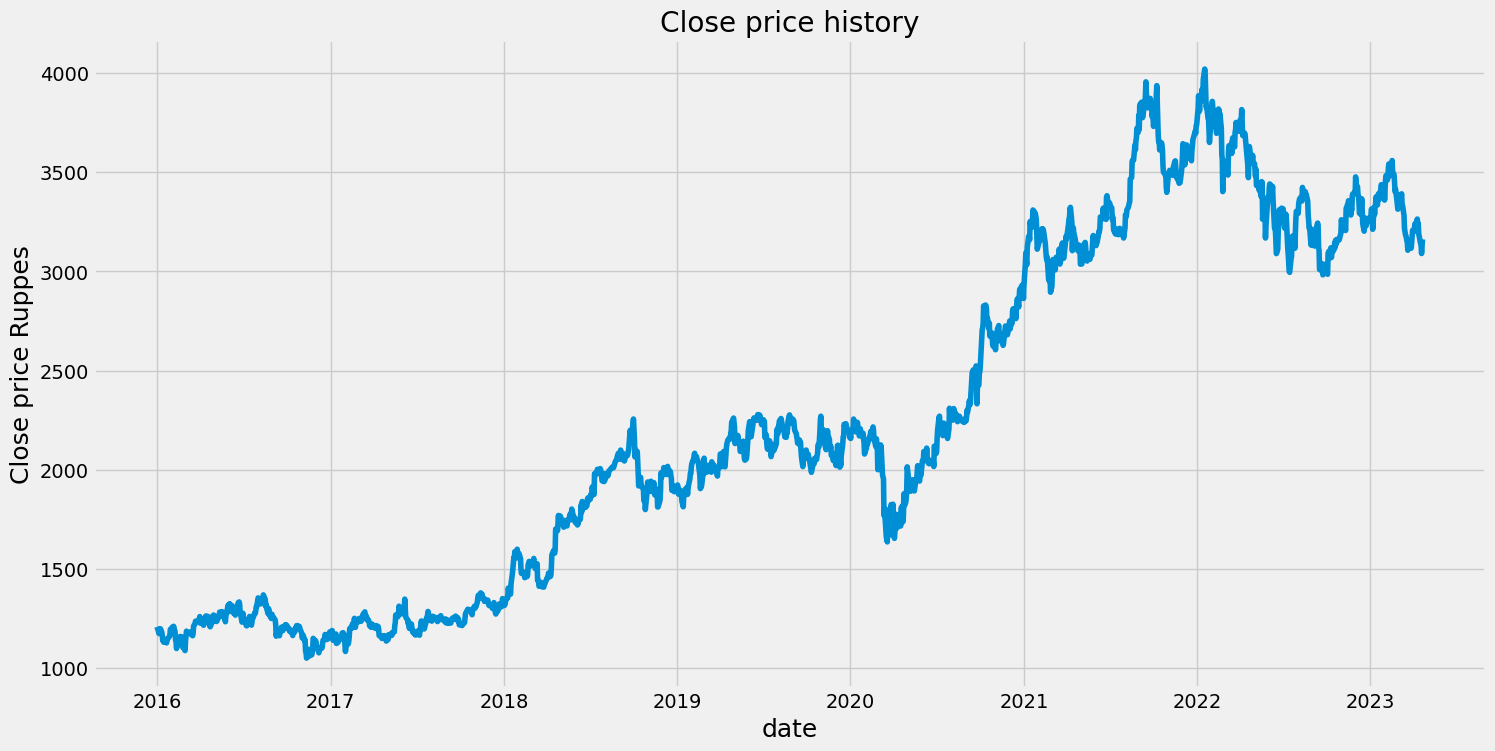

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Close price history")
plt.plot(df['Close'])
plt.xlabel('date' , fontsize=18)
plt.ylabel('Close price Ruppes' , fontsize=18)
plt.show()

In [ ]:
# create a new data frame 
data = df.filter(['Close'])
# convert data frame into numpy array
dataset = data.values
# get the number of rows
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1443

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.05309787],
       [0.04521533],
       [0.04173721],
       ...,
       [0.70073186],
       [0.68687002],
       [0.71087144]])

In [ ]:
#create the training data set
train_data = scaled_data[0:training_data_len,:]
#split
x_train =[]
y_train =[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  

In [ ]:
#convert x and y train to numpy array
x_train , y_train = np.array(x_train) , np.array(y_train)


In [ ]:
# Reshape the data
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1383, 60, 1)

In [ ]:
# build the lstm model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1)) 

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train , y_train , batch_size= 1 , epochs=1)

1383/1383 [==============================] - 53s 36ms/step - loss: 0.0015


In [ ]:
# /Create the testing data set
# create a new array 1542 to 2002
test_data = scaled_data[training_data_len -60 : , :]
# create the data sets x_test , y_test
x_test = []
y_test = dataset[training_data_len :, :]
for i in range(60 , len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
# convert the data to a numpy array
x_test = np.array(x_test)
# x_test.shape

In [ ]:
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

In [ ]:
# get the model predicted price values
predicitions = model.predict(x_test)
predicitions = scaler.inverse_transform(predicitions)

12/12 [==============================] - 1s 19ms/step


In [ ]:
# get the root mean squared error RMSE
rmse = np.sqrt(np.mean(predicitions - y_test) **2)
rmse

46.70422702365451

<ipython-input-64-c0ca6831b9fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predicitions"] = predicitions


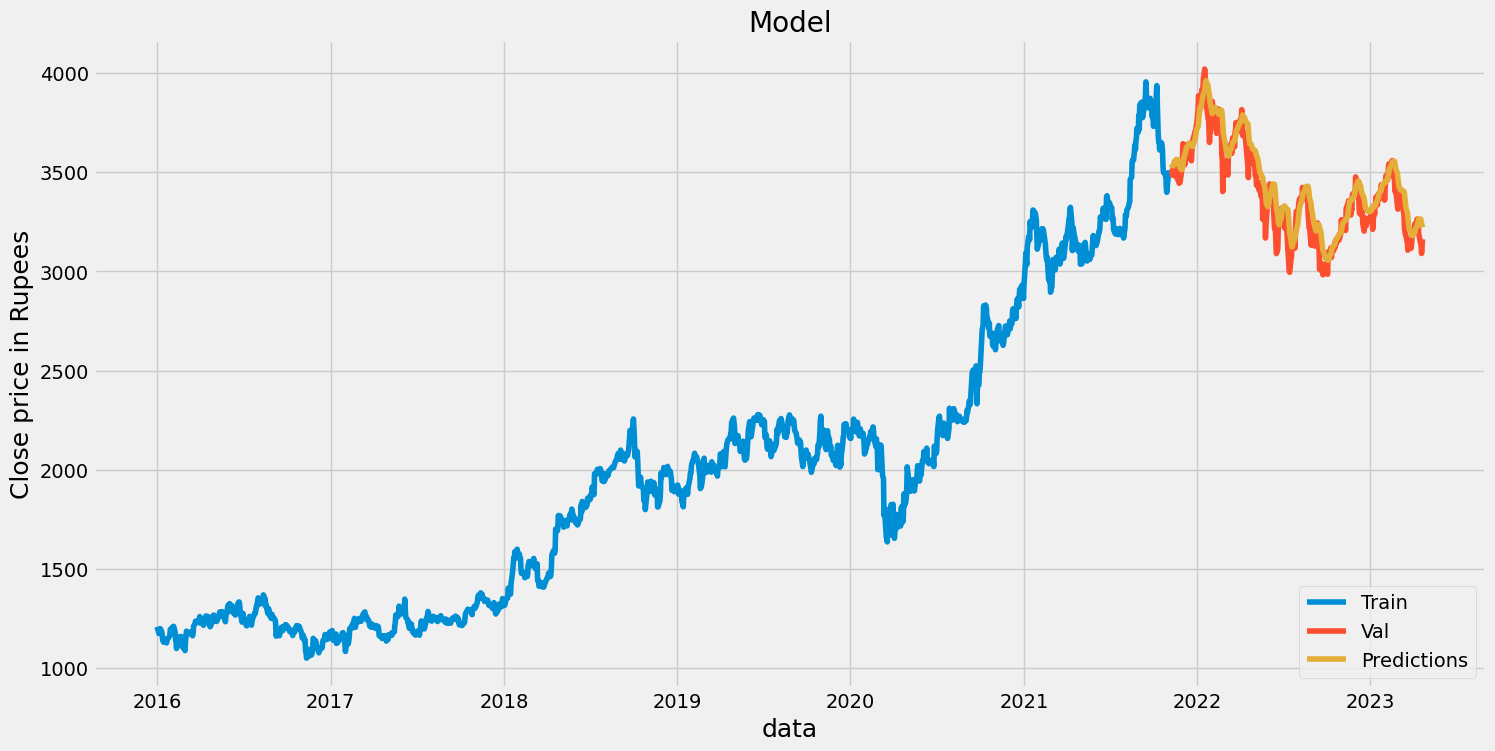

In [ ]:
# plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid["predicitions"] = predicitions
plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel("data" , fontsize = 18)
plt.ylabel("Close price in Rupees" ,fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close" , "predicitions"]])
plt.legend(["Train" ,"Val" , "Predictions"] , loc="lower right")
plt.show()

In [ ]:
# Show the vadi and prediced price
valid

,Close,predicitions
Date,,
2021-11-08,3502.750000,3521.603271
2021-11-09,3505.699951,3526.777344
2021-11-10,3484.300049,3532.000000
2021-11-11,3488.199951,3533.913086
2021-11-12,3526.050049,3534.630371
...,...,...
2023-04-13,3188.850098,3262.612061
2023-04-17,3139.500000,3263.039551
2023-04-18,3130.750000,3253.772461


In [ ]:
tcs_quote = yf.download('TCS.NS', start='2015-01-01', end='2023-05-19')
# create a new  df
new_df = tcs_quote.filter(['Close'])
# Get the last 60 day closing price
last_60_days = new_df[-60:].values
# Scake the data to be value btw 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create empty list
X_test = []
# Append last 60 days
X_test.append(last_60_days_scaled)
# convert the X_test into numpy array
X_test = np.array(X_test)
# reshape the array
x_test =  np.reshape(X_test , (X_test.shape[0],X_test.shape[1],1))
# get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 30ms/step
[[3210.847]]


In [ ]:
apple_quote2 = yf.download('AAPL', start='2012-01-01', end='2019-12-19')
print(apple_quote2["Close"])

[*********************100%***********************]  1 of 1 completed
Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, Length: 2004, dtype: float64
